In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 11.5 MB/s eta 0:00:00


In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.1 MB/s eta 0:00:00


In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the data from drive
df=pd.read_csv('/content/drive/MyDrive/CS215/A4/AirtrafficA4.csv')

In [6]:
%cd /content/drive/MyDrive/CS215/A4

/content/drive/MyDrive/CS215/A4


In [7]:
df

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
0,A007,2023,JAN,"47,977","83,764","41,827","68,47,384","78,32,254","16,881.70","2,043.5"
1,A007,2023,FEB,"44,905","77,936","39,121","67,41,948","73,36,614","17,439.30","2,086.7"
2,A007,2023,MAR,"50,389","87,296","43,793","73,17,288","82,15,681","20,208.40","2,310.1"
3,A007,2023,APR,"48,752","84,232","42,615","74,06,440","80,05,648","19,432.80","2,102.9"
4,A007,2023,MAY,"50,956","87,917","44,505","81,09,626","83,75,201","24,165.10","2,102.4"
...,...,...,...,...,...,...,...,...,...,...
123,A007,2013,AUG,"12,278","21,571","11,884","15,31,406","21,39,007","9,600.00",0
124,A007,2013,SEP,"12,185","21,281","11,749","13,78,691","21,14,792","8,492.00",0
125,A007,2013,OCT,"12,780","22,345","12,296","15,10,184","22,13,139","9,111.00",0
126,A007,2013,NOV,"12,357","21,837","11,904","14,67,763","21,42,765","7,185.00",0


# DATA PRE-PROCESSING

In [8]:
# Bring the YEAR and MONTH columns together to make a sorted datetime index for the data
df['YEAR'] = df['YEAR'].astype(str)
df['MONTH'] = df['MONTH'].astype(str)
df['DATE'] = df['YEAR'] + '-' + df['MONTH']
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.drop(['YEAR', 'MONTH','AIRLINE'], axis=1, inplace=True)  #These feature are of no use
df.sort_index(inplace=True)
df

<ipython-input-8-d77f1c1fc4a1>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
DATE,,,,,,,
2013-01-01,"10,552","18,655","10,112","14,08,012","18,20,105","6,465.00",0
2013-02-01,"9,873","17,374","9,439","13,41,210","16,98,930","6,235.00",0
2013-03-01,"11,393","20,093","11,028","14,23,569","19,84,886","6,505.00",0
2013-04-01,"11,426","20,084","11,090","15,11,094","19,96,084","5,903.00",0
2013-05-01,"11,885","20,779","11,533","16,85,168","20,75,882","7,345.00",0
...,...,...,...,...,...,...,...
2023-04-01,"48,752","84,232","42,615","74,06,440","80,05,648","19,432.80","2,102.9"
2023-05-01,"50,956","87,917","44,505","81,09,626","83,75,201","24,165.10","2,102.4"
2023-06-01,"49,989","86,217","43,739","78,93,296","82,54,272","23,522.60","2,383.0"


In [9]:
# Formatting the datatype to numeric
# Replace commas with empty strings in numeric columns before applying pd.to_numeric
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of type object (likely string)
        df[column] = df[column].str.replace(',', '').astype(float) # Remove commas if present and convert to float

df = df.apply(pd.to_numeric, errors='coerce') #apply pd.to_numeric to the entire DataFrame and handle errors by coercing them to NaN

In [10]:
df

,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
DATE,,,,,,,
2013-01-01,10552.0,18655.0,10112.0,1408012.0,1820105.0,6465.0,0.0
2013-02-01,9873.0,17374.0,9439.0,1341210.0,1698930.0,6235.0,0.0
2013-03-01,11393.0,20093.0,11028.0,1423569.0,1984886.0,6505.0,0.0
2013-04-01,11426.0,20084.0,11090.0,1511094.0,1996084.0,5903.0,0.0
2013-05-01,11885.0,20779.0,11533.0,1685168.0,2075882.0,7345.0,0.0
...,...,...,...,...,...,...,...
2023-04-01,48752.0,84232.0,42615.0,7406440.0,8005648.0,19432.8,2102.9
2023-05-01,50956.0,87917.0,44505.0,8109626.0,8375201.0,24165.1,2102.4
2023-06-01,49989.0,86217.0,43739.0,7893296.0,8254272.0,23522.6,2383.0


<ipython-input-11-a5481e57d6cd>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_scaled_fill['PASSENGERS CARRIED'] = df_scaled['PASSENGERS CARRIED'].fillna(method='ffill')


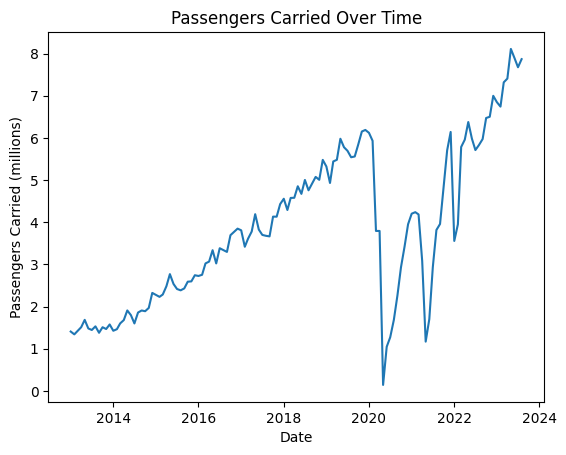

In [11]:
# Plotting passengers carried vs index, replacing Nan with just previous value
df_scaled = df.copy()
#Scaling the data as passengers carried is of the order of lacs
df_scaled['PASSENGERS CARRIED'] = df_scaled['PASSENGERS CARRIED'] / 1000000
df_scaled_fill = df_scaled.copy()
df_scaled_fill['PASSENGERS CARRIED'] = df_scaled['PASSENGERS CARRIED'].fillna(method='ffill')

# plot
plt.plot(df_scaled_fill.index, df_scaled_fill['PASSENGERS CARRIED'])
plt.xlabel('Date')
plt.ylabel('Passengers Carried (millions)')
plt.title('Passengers Carried Over Time')
# Save the plot
plt.savefig('passengers_carried_plot.png')
plt.show()

The plot shows a trend, with almost no seasonality. There is an abrupt change and break in trend from 2020.

In [12]:
# Analysing the data
df_scaled.info()
# check the missing values
df_scaled.isnull().sum()
# print the missing rows
df_scaled[df_scaled.isnull().any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2013-01-01 to 2023-08-01
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TOTAL DEPARTURES                        127 non-null    float64
 1   HOURS FLOWN                             127 non-null    float64
 2   KILOMETRE FLOWN                         127 non-null    float64
 3   PASSENGERS CARRIED                      127 non-null    float64
 4   AVAILABLE SEAT KILOMETRE (IN THOUSAND)  127 non-null    float64
 5    FREIGHT CARRIED (IN TONNE)             127 non-null    float64
 6   MAIL CARRIED (IN TONNE)                 126 non-null    float64
dtypes: float64(7)
memory usage: 8.0 KB


,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
DATE,,,,,,,
2020-03-01,32233.0,56567.0,28386.0,3.793464,4985152.0,15280.6,NaN
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are only two rows with missing values, which are also consecutive. Since this is a time series, simply dropping the row will break the series. Hence we are going to impute the missing values.

In [13]:
# save the df_scaled
df_scaled.to_csv('df_scaled.csv')

# ANALYSIS


Lets see at what 'd', the data becomes stationary

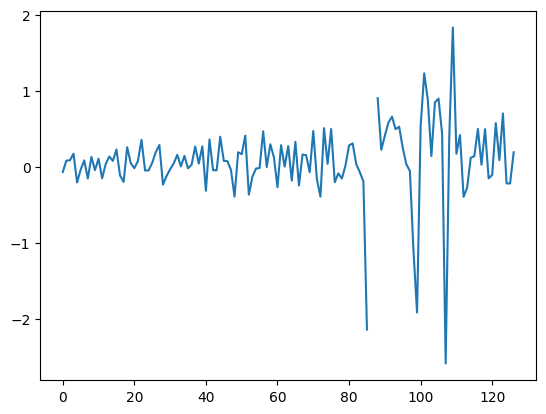

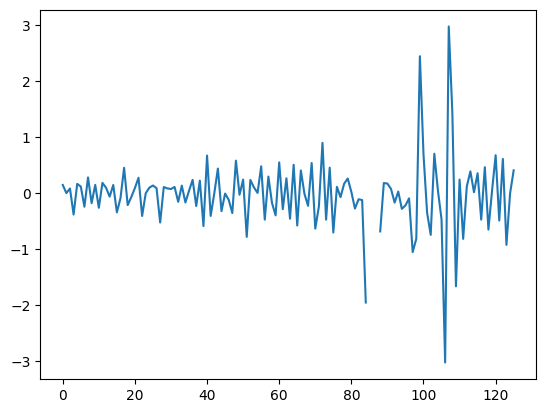

In [14]:

passengers=np.array(df_scaled['PASSENGERS CARRIED'])
diff1=np.diff(passengers)

#plotting diff1
plt.plot(diff1)
plt.show()

#plotting diff2
diff2=np.diff(diff1)
plt.plot(diff2)
plt.show()

Clearly, except for the abupt change part of data, d=1 makes the data stationary.

In [15]:
## find the locations of abrupt changes in diff1
print(np.where(diff1<-1))


(array([ 85,  98,  99, 107]),)


Now, lets look for seasonality


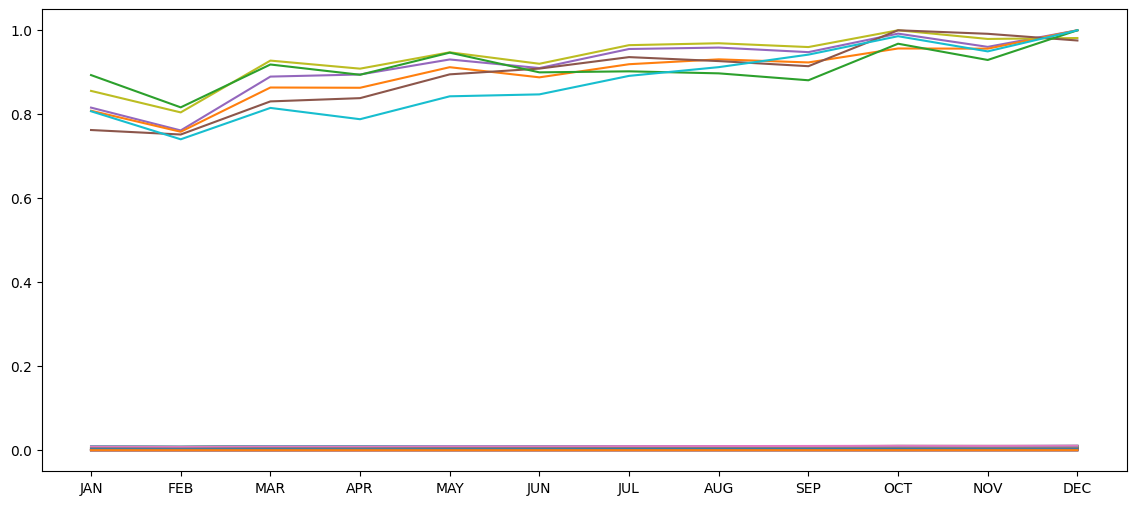

In [16]:
# Lets plot each years data on the same plot, with different colours
# Basically, plotting each 12 rows at once
plt.figure(figsize=(14,6))
for i in range(0,72,12):
  one_year=np.array(df_scaled.iloc[i:i+12])
  #scale each years data by their min-max
  one_year=(one_year-one_year.min())/(one_year.max()-one_year.min())
  plt.plot(one_year)
plt.xticks(np.arange(0,12),['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

In [17]:
import warnings
import statsmodels.api as sm
import statsmodels.tsa.api as smt
warnings.filterwarnings("ignore")

# adapted from https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python
def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

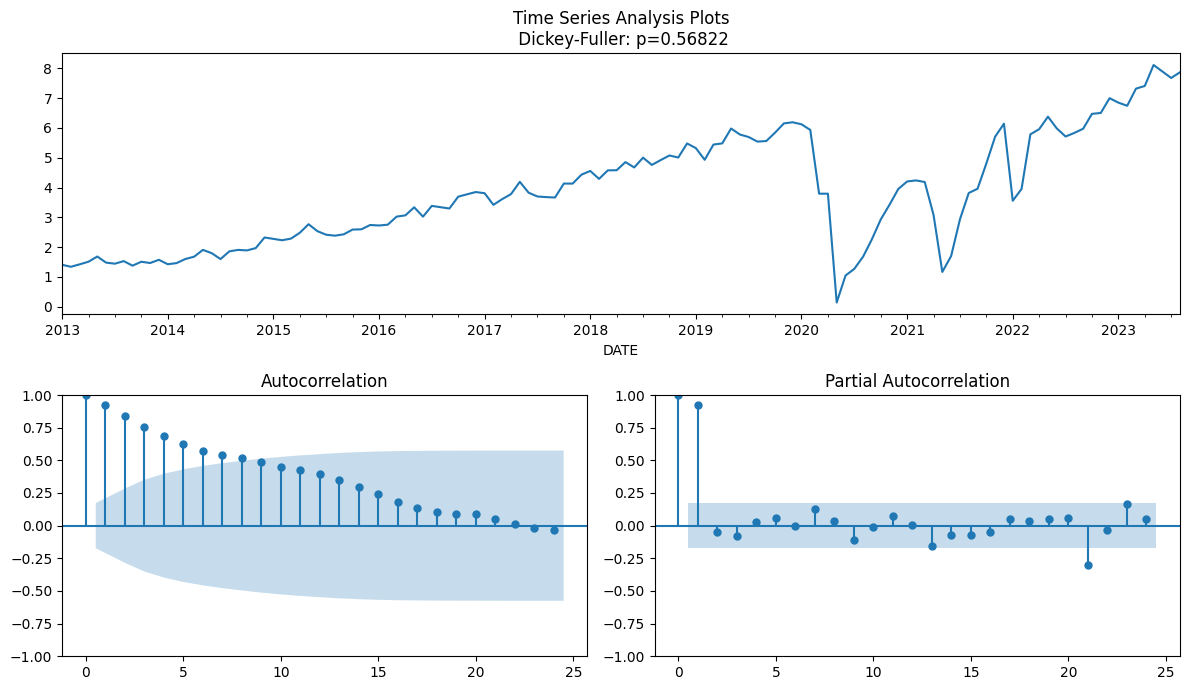

In [18]:
df_filled=df_scaled.fillna(method='ffill')
tsplot(df_filled['PASSENGERS CARRIED'], lags=24)

The p-value is too high, so we are going to take d=1 to make the data stationary.

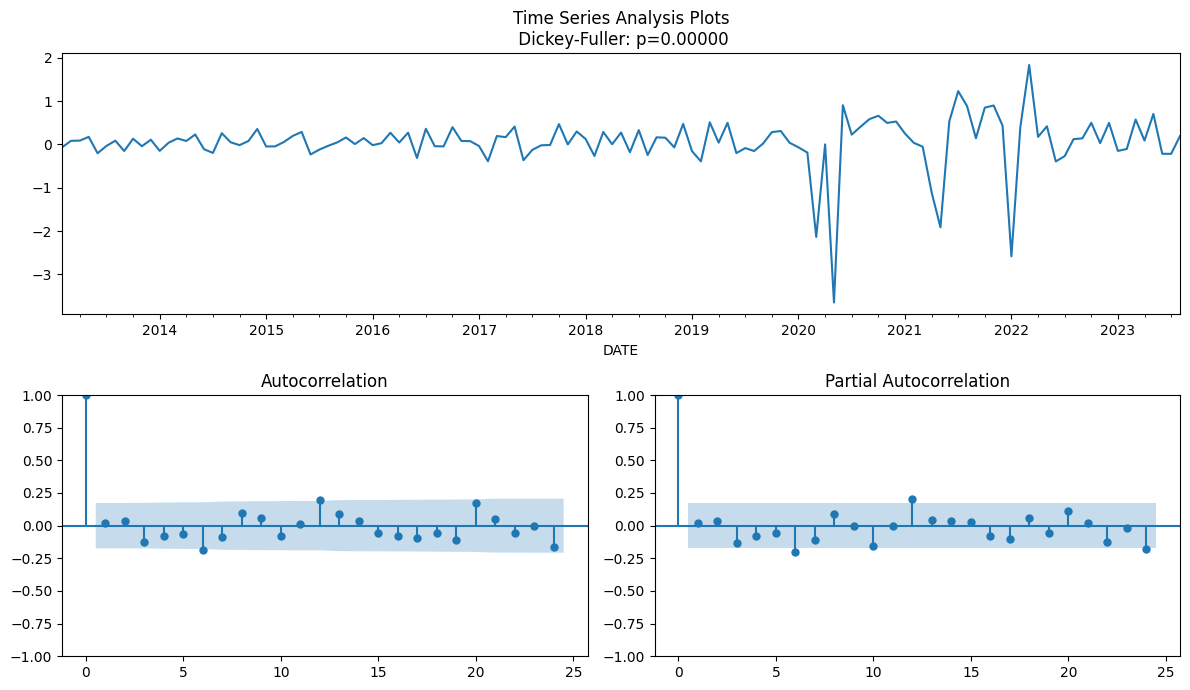

In [19]:
# set d=1 for the tsplot
diff_filled=df_filled.copy()
diff_filled['PASSENGERS CARRIED']=diff_filled['PASSENGERS CARRIED'].diff()
diff_filled=diff_filled.dropna()
tsplot(diff_filled['PASSENGERS CARRIED'], lags=24)

Sinc p=0, we can safely say that at d=1, the data becomes stationary

The forecast plot is gonna be used next.

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


def plot_forecast(series_train, series_test, forecast, forecast_int,target_variable_name, coverage):

    mae = mean_absolute_error(series_test, forecast)
    mape = mean_absolute_percentage_error(series_test, forecast)

    # Convert PeriodIndex to numerical values for plotting
    train_x = np.arange(len(series_train))
    test_x = np.arange(len(series_train), len(series_train) + len(series_test))
    forecast_x = np.arange(len(series_train), len(series_train) + len(forecast))

    plt.figure(figsize=(12, 6))
    # Use converted numerical values for plotting
    plt.plot(train_x, series_train, label="Train")
    plt.plot(test_x, series_test, label="Test")
    plt.plot(forecast_x, forecast, label="Forecast")

    # # Assuming forecast_int is a DataFrame with MultiIndex columns
    # for cov in coverage:
    #     plt.fill_between(
    #         series_test.index,
    #         forecast_int[(target_variable_name, cov, 'lower')],  # Access using MultiIndex
    #         forecast_int[(target_variable_name, cov, 'upper')],  # Access using MultiIndex
    #         alpha=0.2,
    #         label=f"{int(cov * 100)}% Prediction Interval"
    #     )

    plt.legend()
    plt.title("Forecast vs Actual")
    plt.show()

    return mae, mape

# MODEL 1







This model will be using:

Look backward to fill the Nan of two rows.

SARIMA (yearly seasonality, non-stationary data)

Only the data till before 2020(To avoid the abrupt changes)

Only the PASSENGERS CARRIED itself as a feature

In [21]:
# Filling the data using Look Backward
df1 = df.copy()
df1 = df1.fillna(method='bfill')

In [22]:
# We want data till before 2020 only
part1 = df1.loc[:'2016-12-01']
data1=part1['PASSENGERS CARRIED']

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
# Fitting a SARIMA model
model1_v1 = SARIMAX(data1, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit1 = model1_v1.fit()

In [25]:
# Predict on the complete timeline of df1
start_date = df1.index.min()
end_date = df1.index.max()
prediction1_v1 = model_fit1.predict(start=start_date, end=end_date, dynamic=False)  #making dynamic predictions

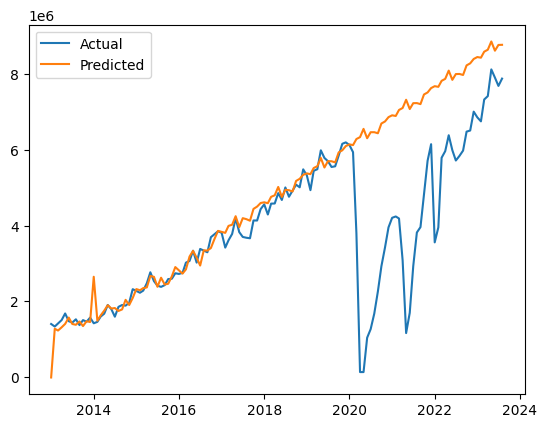

In [26]:
# Plot the prediction vs actual values
plt.plot(df1.index, df1['PASSENGERS CARRIED'], label='Actual')
plt.plot(prediction1_v1.index, prediction1_v1, label='Predicted')
plt.legend()
plt.show()

# FINAL MODEL

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
### Lets try interpolating the data with somewhat fluctuations, from start of 2020 to end of 2022
### use that in place of orignal data
# Assuming df1 is your original DataFrame with a 'PASSENGERS CARRIED' column
# and a DateTimeIndex

# 1. Extract relevant data:
data_2013_2017 = df1.loc['2013-01-01':'2017-12-31', 'PASSENGERS CARRIED']
data_2023 = df1.loc['2023-01-01':'2023-08-31', 'PASSENGERS CARRIED']


In [33]:

# 2. Calculate trend using Linear Regression:
X = np.arange(len(data_2013_2017)).reshape(-1, 1)  # Time as independent variable
y = data_2013_2017.values  # Passenger data as dependent variable
reg = LinearRegression().fit(X, y)
trend_slope = reg.coef_[0]  # Slope of the trend line


In [48]:

# 3. Interpolate data for 2020-2022 with fluctuations:
data_2017 = df1.loc['2017-01-01':'2017-12-31', 'PASSENGERS CARRIED']
start_val = data_2017.iloc[-1]
num_months_to_interpolate = 60

# Calculate standard deviation of fluctuations in 2013-2017 data
fluctuation_std = data_2013_2017.diff().std()

# Generate interpolated data with fluctuations
interpolated_data = [
    start_val + trend_slope * i + np.random.normal(scale=fluctuation_std)
    for i in range(1, num_months_to_interpolate + 1)
]
interpolated_index = pd.date_range(start='2018-01-01', periods=num_months_to_interpolate, freq='M')
interpolated_series = pd.Series(interpolated_data, index=interpolated_index)


In [36]:
# 4. Combine data:
combined_data = pd.concat([data_2013_2017, interpolated_series, data_2023])
combined_data.index = df1.index

In [37]:
print(combined_data)

DATE
2013-01-01    1408012.0
2013-02-01    1341210.0
2013-03-01    1423569.0
2013-04-01    1511094.0
2013-05-01    1685168.0
                ...    
2023-04-01    7406440.0
2023-05-01    8109626.0
2023-06-01    7893296.0
2023-07-01    7674890.0
2023-08-01    7867259.0
Length: 128, dtype: float64


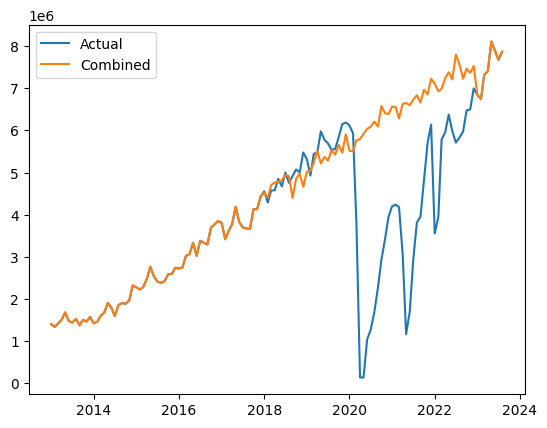

In [38]:
#Plot the combined data and actual data df1 together
plt.plot(df1.index, df1['PASSENGERS CARRIED'], label='Actual')
plt.plot(combined_data.index, combined_data, label='Combined')
plt.legend()
plt.show()


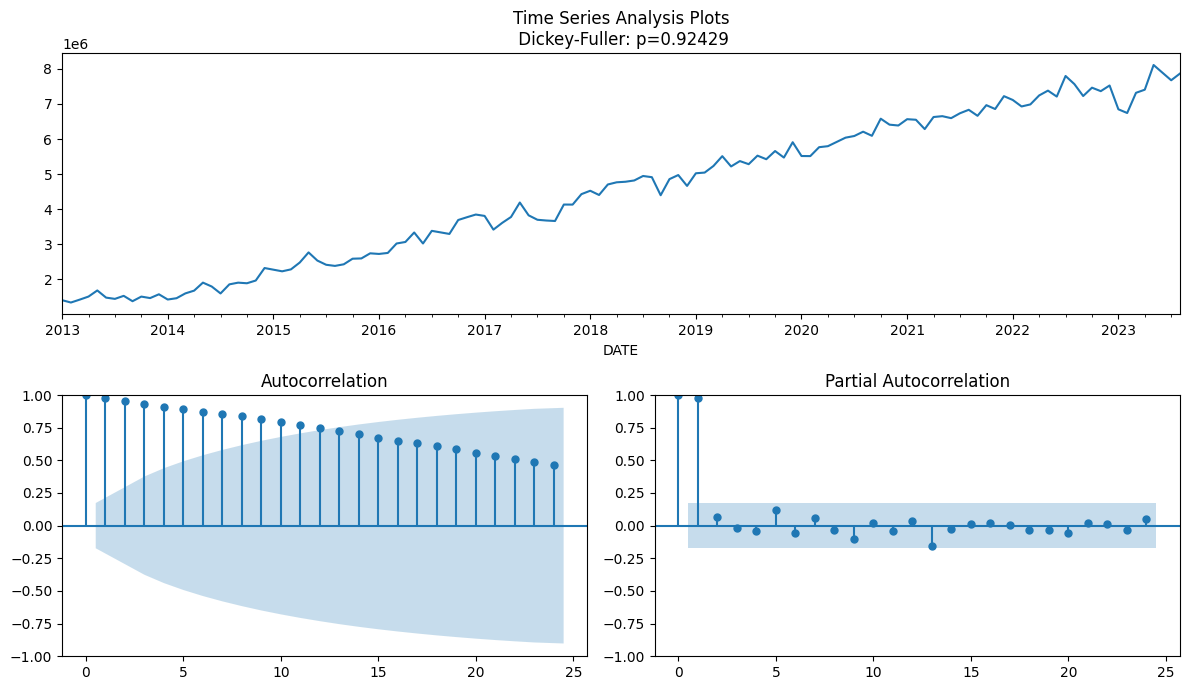

In [39]:
## tsplot for combined data
tsplot(combined_data, lags=24)

This suggest diff=1, p=11, q=1

In [40]:
# 5. Fit ARIMA model:
model1_v3 = SARIMAX(combined_data, order=(11, 1, 1), seasonal_order=(1,1,1,12))  # Replace with your chosen orders
model_fit1_v3 = model1_v3.fit()
model_fit1_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  128
Model:             SARIMAX(11, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1567.118
Date:                             Mon, 28 Oct 2024   AIC                           3164.236
Time:                                     12:20:50   BIC                           3205.410
Sample:                                 01-01-2013   HQIC                          3180.948
                                      - 08-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8545      0.608     -1.406      0.160      -2.046       0.337
ar.L2         -0.5057      0.264     -1.916      0.055      -1.023       0.012
ar.L3         -0.3426      0.279     -1.230      0.219      -0.889       0.204
ar.L4         -0.3601      0.243     -1.481      0.139      -0.837       0.116
ar.L5         -0.2612      0.296     -0.882      0.378      -0.841       0.319
ar.L6         -0.2059      0.240     -0.858      0.391      -0.676       0.265
ar.L7         -0.2348      0.238     -0.988      0.323      -0.701       0.231
ar.L8         -0.1889      0.259     -0.729      0.466      -0.697       0.319
ar.L9         -0.3898      0.255     -1.531      0.126      -0.889       0.109
ar.L10        -0.2299      0.359     -0.641      0.522      -0.933       0.474
ar.L11        -0.1835      0.263     -0.699      0.485      -0.698       0.331
ma.L1          0.4995      0.601      0.831      0.406      -0.679       1.678
ar.S.L12      -0.1622      0.204     -0.796      0.426      -0.562       0.237
ma.S.L12      -0.6765      0.213     -3.170      0.002      -1.095      -0.258
sigma2      5.513e+10   5.07e-12   1.09e+22      0.000    5.51e+10    5.51e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                12.36
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.36
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.43e+38. Standard errors may be unstable.
"""

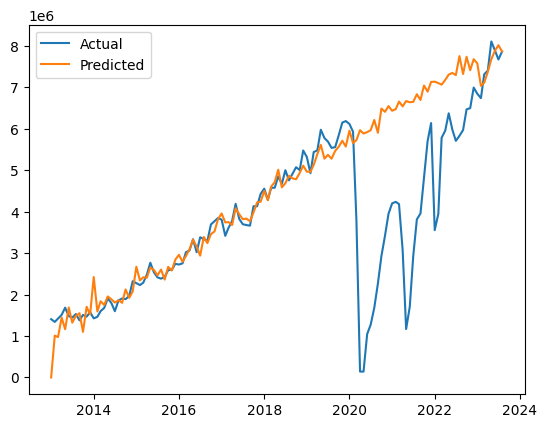

In [41]:
# Now predict n plot
start_date = df1.index.min()
end_date = df1.index.max()
prediction1_v3 = model_fit1_v3.predict(start=start_date, end=end_date, dynamic=False)

#plot
plt.plot(df1.index, df1['PASSENGERS CARRIED'], label='Actual')
plt.plot(prediction1_v3.index, prediction1_v3, label='Predicted')
plt.legend()
plt.show()

In [42]:
# Now forecast using the model for the timeline combined_Data last index +1, from there to 12 months,for each month
prediction1_v3_forecast=model_fit1_v3.forecast(steps=12)

DatetimeIndex(['2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', freq='MS')


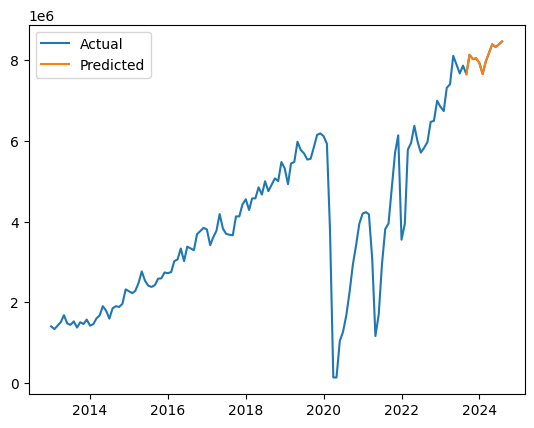

In [43]:
#index the forecasted prediction with months in the same format as df1, from the month after the last index of df1
forecast_index = pd.date_range(start=df1.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
print(forecast_index)

#use this index to index the prediction
prediction1_v3_forecast.index=forecast_index
prediction1_v3_forecast.name='PASSENGERS CARRIED'
plot_df=pd.concat([df1['PASSENGERS CARRIED'],prediction1_v3_forecast],axis=0)

#plot the plot_Df....but the two concatenated parts hsould appear with different colurs
#set the colours
plt.plot(plot_df.index, plot_df, label='Actual')
plt.plot(prediction1_v3_forecast.index, prediction1_v3_forecast, label='Predicted')
plt.legend()
plt.show()

In [44]:
#now save the predicted df as csv...with two columns....YEAR_MONTH(20XX ABC format) and PASSENGERS CORRIED
#set the ormat of year month to like 20XX ABC
prediction1_v3_forecast.index = prediction1_v3_forecast.index.strftime('%Y %b')
prediction1_v3_forecast.name = 'PASSENGERS CARRIED'


In [45]:

#now remove the index and set it as a column
prediction1_v3_forecast = prediction1_v3_forecast.reset_index()
prediction1_v3_forecast.columns = ['YEAR_MONTH', 'PASSENGERS CARRIED']
prediction1_v3_forecast

,YEAR_MONTH,PASSENGERS CARRIED
0,2023 Sep,7.653673e+06
1,2023 Oct,8.135739e+06
2,2023 Nov,8.029600e+06
3,2023 Dec,8.047787e+06
4,2024 Jan,7.936037e+06
5,2024 Feb,7.658692e+06
6,2024 Mar,7.965843e+06
7,2024 Apr,8.186362e+06
8,2024 May,8.396182e+06
9,2024 Jun,8.329162e+06


In [47]:
#capitalize the years column
prediction1_v3_forecast['YEAR_MONTH'] = prediction1_v3_forecast['YEAR_MONTH'].str.upper()
#save it to csv
prediction1_v3_forecast.to_csv('final_forecast.csv', index=False)

The interpolating model utilies linear regression for outlier smoothing in the region of abrupt changes in the time series.